# 08CaseCOVID19

# Libraries

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from IPython.display import display



sns.set_palette("pastel")

# Loading Data

In [2]:
case = pd.read_csv(
    "C:\py\Projects\TuringCollege\COVID19\DataSets\\case.csv",
    index_col=False,
    skipinitialspace=True,
)

# Display Data

In [3]:
pd.set_option("max_rows", None)

# Size

In [4]:
case.shape

(174, 8)

# Missing Data

In [5]:
case.isna().sum()

case_id           0
province          0
city              0
group             0
infection_case    0
confirmed         0
latitude          0
longitude         0
dtype: int64

# Delete Unneeded Columns

In [6]:
case = case.drop(["case_id", "city", "group", "latitude", "longitude"], axis=1)

# Delete Unneeded Row

In [7]:
case = case[case.infection_case != 'etc']

# Rename Columns

In [8]:
case.rename(
    columns={
        "province": "Province",
        "infection_case": "Infection Reason",
        "confirmed": "Confirmed",
    },
    inplace=True,
)

# Rename Column Values

In [9]:
case.replace('contact with patient', 'Contact with Patient', inplace=True)
case.replace('overseas inflow', 'Overseas Inflow', inplace=True)
case.replace('gym facility in Cheonan', 'Gym Facility in Cheonan', inplace=True)
case.replace('Door-to-door sales in Daejeon', 'Door-to-Door Sales in Daejeon', inplace=True)
case.replace('gym facility in Cheonan', 'Gym Facility in Cheonan', inplace=True)
case.replace('Geumcheon-gu rice milling machine manufacture', 'Geumcheon-gu Rice Milling Machine Manufacture', inplace=True)
case.replace('Lotte Confectionery logistics center', 'Lotte Confectionery Logistics Center', inplace=True)
case.replace('gym facility in Sejong', 'Gym Facility in Sejong', inplace=True)
case.replace('Seoul City Hall Station safety worker', 'Seoul City Hall Station Safety Worker', inplace=True)
case.replace('Gangnam Yeoksam-dong gathering', 'Gangnam Yeoksam-dong Gathering', inplace=True)
case.replace('Seongnam neighbors gathering', 'Seongnam neighbors Gathering', inplace=True)
case.replace('Eunpyeong-Boksagol culture center', 'Eunpyeong-Boksagol Culture Center', inplace=True)
case.replace('Biblical Language study meeting', 'Biblical Language Study Meeting', inplace=True)
case.replace('Daejeon door-to-door sales', 'Daejeon Door-to-Door Sales', inplace=True)

# Dataset

In [10]:
pd.set_option("max_rows", None)

In [11]:
case.head()

,Province,Infection Reason,Confirmed
0,Seoul,Itaewon Clubs,139
1,Seoul,Richway,119
2,Seoul,Guro-gu Call Center,95
3,Seoul,Yangcheon Table Tennis Club,43
4,Seoul,Day Care Center,43


# Total Cases

In [19]:
pivot_infection = pd.pivot_table(
    data=case, index=["Infection Reason"], values="Confirmed", aggfunc = 'sum').sort_values('Confirmed', ascending = False)

pivot_infection

,Confirmed
Infection Reason,
Shincheonji Church,5213
Contact with Patient,1403
Overseas Inflow,949
Itaewon Clubs,271
Second Mi-Ju Hospital,196
Richway,184
Guro-gu Call Center,167
Coupang Logistics Center,134
Hansarang Convalescent Hospital,124


In [13]:
total = pivot_infection['Confirmed'].sum()
total

10203

# Daegu

In [20]:
pivot_province = pd.pivot_table(
    data=case, index=["Province"], values="Confirmed", aggfunc = 'sum').sort_values('Confirmed', ascending = False)

pivot_province

,Confirmed
Province,
Daegu,5933
Gyeongsangbuk-do,1191
Seoul,1180
Gyeonggi-do,916
Incheon,191
Chungcheongnam-do,146
Busan,126
Daejeon,116
Gyeongsangnam-do,112


# Daegu

In [21]:
daegu = pivot_province.loc['Daegu']
daegu = daegu ['Confirmed']
daegu

5933

# Shincheonji Church

In [ ]:
shincheonji_church = pivot_infection.loc['Shincheonji Church']
shincheonji_church = shincheonji_church['Confirmed']
shincheonji_church 

# Shincheonji Church in Daegu

In [15]:
shincheonji_church_daegu = case.loc[
    (case["Province"] == "Daegu") & (case["Infection Reason"] == "Shincheonji Church")
]

shincheonji_church_daegu = shincheonji_church_daegu.set_index('Infection Reason')
shincheonji_church_daegu = shincheonji_church_daegu.loc['Shincheonji Church']
shincheonji_church_daegu = shincheonji_church_daegu['Confirmed']
shincheonji_church_daegu

4511

# Case Numbers

In [16]:
cases = pd.DataFrame(
    {
        "Total": total,
        "Daegu": daegu,
        "Shincheonji Church": shincheonji_church,
        "Shincheonji Church Daegu": shincheonji_church_daegu
    }, index = ['Confirmed']
)

cases = cases.T
cases = cases.reset_index()

NameError: name 'daegu' is not defined

NameError: name 'cases' is not defined

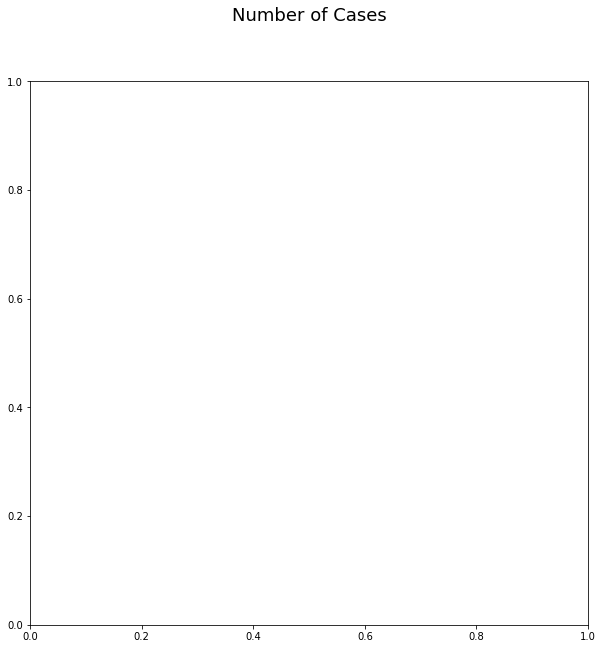

In [17]:
plt.figure(figsize=(10, 10))

plt.title("Number of Cases", fontsize=18, y=1.1)

chart = sns.barplot(
    y =["Total", "Daegu Province", "Shincheonji Church", "Shincheonji Church Daegu"],
    x ="Confirmed",
    data=cases,
    ci=None
)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Case Numbers", fontsize=16, labelpad=25)
plt.ylabel("Province", fontsize=16, labelpad=25)

chart.bar_label(chart.containers[0], size=25)

sns.despine(left=True, bottom=True);

NameError: name 'shincheonji_church' is not defined

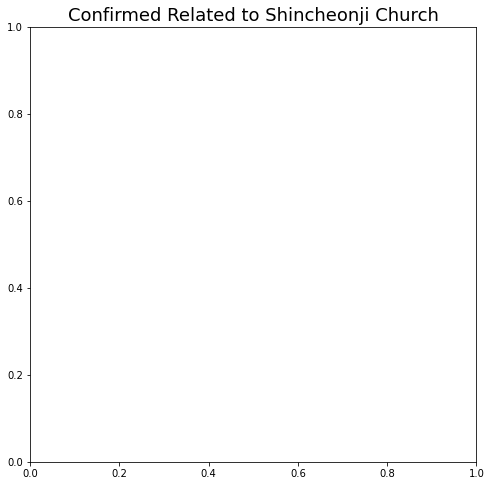

In [18]:
plt.figure(figsize=(8, 8))

plt.title("Confirmed Related to Shincheonji Church", fontsize=18, y=1)

sns.set_context("paper", font_scale=2.0)

ord_color = "bisque"
spec_lev1 = "red"

data = [shincheonji_church, total]
labels = ['Shincheonji Church', 'Total']
colors = [spec_lev1, ord_color]

plt.pie(data, labels=labels,colors = colors, autopct = '%0.0f%%')
plt.show()